In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [4]:
fish = pd.read_csv("fish.csv")
fish.shape

(34299, 101)

In [5]:
fish.columns

Index(['SpecCode', 'Species', 'Genus', 'SpeciesRefNo', 'Author', 'FBname',
       'PicPreferredName', 'PicPreferredNameM', 'PicPreferredNameF',
       'PicPreferredNameJ',
       ...
       'Profile', 'PD50', 'Emblematic', 'Entered', 'DateEntered', 'Modified',
       'DateModified', 'Expert', 'DateChecked', 'TS'],
      dtype='object', length=101)

In [6]:
fish = fish.filter(["Species","Length","Weight"])
fish

Species  Length   Weight
0      Aapticheilichthys websteri    3.08      NaN
1                Aaptosyax grypus  130.00  30000.0
2          Abactochromis labrosus   11.50      NaN
3          Abalistes filamentosus   32.50   1375.0
4             Abalistes stellaris   60.00      NaN
...                           ...     ...      ...
34294                Zu cristatus  118.00      NaN
34295                Zu elongatus  120.00      NaN
34296                Zungaro jahu  140.00      NaN
34297             Zungaro zungaro  140.00      NaN
34298  Zungaropsis multimaculatus     NaN      NaN

[34299 rows x 3 columns]

In [7]:
train = fish.dropna(axis='index')
train

Species  Length   Weight
1             Aaptosyax grypus   130.0  30000.0
3       Abalistes filamentosus    32.5   1375.0
9      Abbottina obtusirostris    10.9     13.5
14              Ablennes hians   140.0   4800.0
24               Abramis brama    82.0   6010.0
...                        ...     ...      ...
34265               Zeus faber    90.0   8000.0
34266             Zingel asper    22.0    100.0
34270       Zoarces americanus   110.0   5436.0
34273         Zoarces fedorovi    23.0     92.0
34275        Zoarces viviparus    52.0    510.0

[2172 rows x 3 columns]

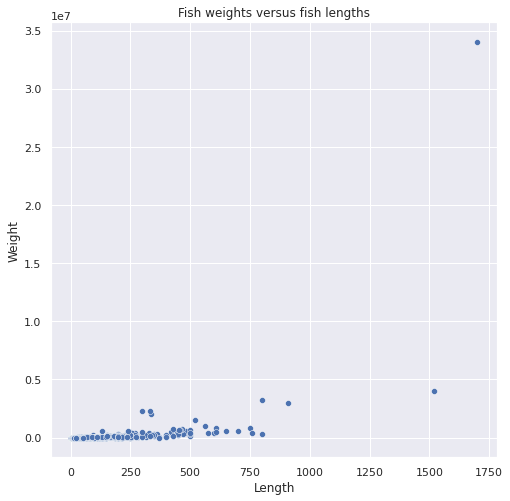

In [8]:
sns.scatterplot(data=train, x="Length", y="Weight")
plt.title("Fish weights versus fish lengths")
plt.savefig("fish_lw.png")

In [9]:
train = train.assign(LogLength = np.log(train.Length), LogWeight = np.log(train.Weight))

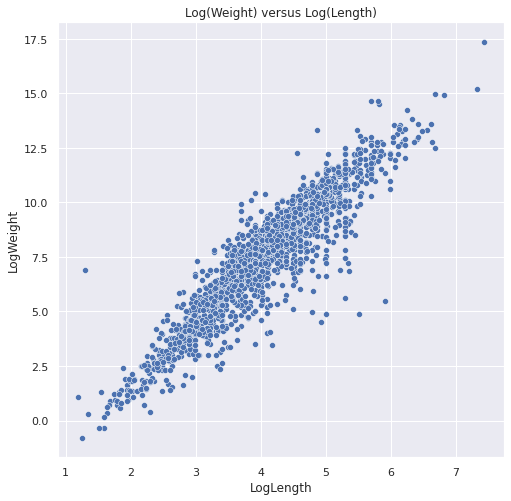

In [10]:
sns.scatterplot(data=train, x="LogLength", y="LogWeight")
plt.title("Log(Weight) versus Log(Length)")
plt.savefig("fish_logs.png")

In [11]:
train.LogLength.corr( train.LogWeight )

0.9230692454775014

In [12]:
train_model = smf.ols( "LogWeight ~ LogLength", data=train)
train_fit = train_model.fit()
train_fit.params

Intercept   -3.322617
LogLength    2.681095
dtype: float64

In [13]:
train_fit.rsquared

0.852056831946404

In [14]:
sharks = pd.read_csv("chondrichthyes.csv")
sharks.head()

Species         Category
0       Hexanchus griseus  Near Threatened
1             Lamna nasus       Vulnerable
2   Leucoraja lentiginosa    Least Concern
3    Dactylobatus clarkii    Least Concern
4  Pseudobatos percellens       Endangered

In [15]:
sharks = sharks.join( fish.set_index("Species"), on="Species")
sharks.head()

Species         Category  Length    Weight
0       Hexanchus griseus  Near Threatened   482.0  590000.0
1             Lamna nasus       Vulnerable   350.0  230000.0
2   Leucoraja lentiginosa    Least Concern    43.0       NaN
3    Dactylobatus clarkii    Least Concern    59.0       NaN
4  Pseudobatos percellens       Endangered   100.0     955.1

In [16]:
sharks = sharks[ sharks.Length.notna() ]
sharks = sharks[ sharks.Category != "Data Deficient" ]
sharks.head()

Species         Category  Length    Weight
0       Hexanchus griseus  Near Threatened   482.0  590000.0
1             Lamna nasus       Vulnerable   350.0  230000.0
2   Leucoraja lentiginosa    Least Concern    43.0       NaN
3    Dactylobatus clarkii    Least Concern    59.0       NaN
4  Pseudobatos percellens       Endangered   100.0     955.1

In [17]:
imp = np.exp( train_fit.params.Intercept )*np.power( sharks.Length, 
                                                    train_fit.params.LogLength )
sharks.Weight = sharks.Weight.where( sharks.Weight.notna(), imp )
sharks

Species         Category  Length         Weight
0          Hexanchus griseus  Near Threatened   482.0  590000.000000
1                Lamna nasus       Vulnerable   350.0  230000.000000
2      Leucoraja lentiginosa    Least Concern    43.0     863.950740
3       Dactylobatus clarkii    Least Concern    59.0    2017.563809
4     Pseudobatos percellens       Endangered   100.0     955.100000
...                      ...              ...     ...            ...
1179    Pateobatis jenkinsii       Vulnerable   130.0   16775.968002
1180  Pristiophorus cirratus    Least Concern   137.0   19308.807587
1181    Squatina californica  Near Threatened   152.0   25511.414447
1182    Urogymnus granulatus       Vulnerable   141.0   20857.643324
1185  Callorhinchus capensis    Least Concern   122.0    5250.000000

[809 rows x 4 columns]

In [18]:
sharks = sharks.assign(LogLength = np.log(sharks.Length), 
                       LogWeight = np.log(sharks.Weight))

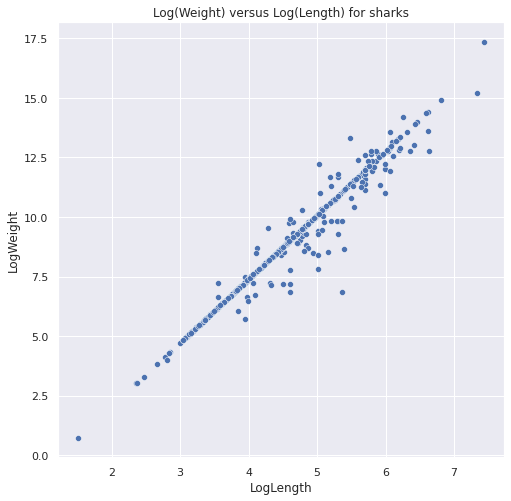

In [19]:
sns.scatterplot( data=sharks, x="LogLength", y="LogWeight")
plt.title("Log(Weight) versus Log(Length) for sharks")
plt.savefig("sharks_lw.png")

In [20]:
# sharks.to_csv("sharks.csv",index=False)